In [40]:
import json
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

In [54]:
RESULTS_DIR = 'results/cloudlab_sqlite_1800'

In [49]:
data = defaultdict(list)
for filename in os.listdir(RESULTS_DIR):
    if not filename.startswith('latency_'): continue
    with open(os.path.join(RESULTS_DIR, filename), 'r') as writer:
        latency_results = json.load(writer)
        for key in latency_results:
            data[key].extend(latency_results[key])

data = {key: pd.Series(data[key]) * 1000 for key in data}
data

{'payment': 0        20.627737
 1         9.707689
 2        11.993408
 3        12.317419
 4        25.745630
            ...    
 47415    12.119293
 47416    12.081623
 47417    12.422562
 47418    16.865969
 47419    31.668901
 Length: 47420, dtype: float64,
 'order': 0        39.350271
 1        23.965836
 2        39.186239
 3        28.076649
 4        40.796041
            ...    
 49605    17.210245
 49606    46.002626
 49607    27.803659
 49608    27.965546
 49609    40.807724
 Length: 49610, dtype: float64,
 'delivery': 0       33.559561
 1       29.826880
 2       15.133142
 3       33.402681
 4       20.149946
           ...    
 4336    59.404373
 4337    40.113688
 4338    52.078009
 4339    43.900490
 4340    54.784298
 Length: 4341, dtype: float64,
 'order_status': 0       12.347221
 1       14.198065
 2        8.057117
 3        7.938862
 4       10.857821
           ...    
 4417    13.778210
 4418    15.055418
 4419    21.711826
 4420    10.284901
 4421    12.012482

# Plots

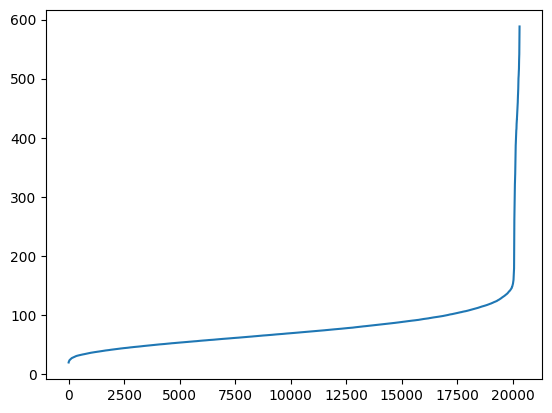

In [14]:
# Cumulative Distribution Function
cumsum = np.arange(1, len(data['order']) + 1) / len(data['order'])
plt.plot(data['order'])
# plt.set_xlabel('Latency (ms)')
# ax.set_ylabel('Cumulative Probability')
# ax.set_title('Cumulative Distribution Function (CDF) of API Latencies')
plt.show()

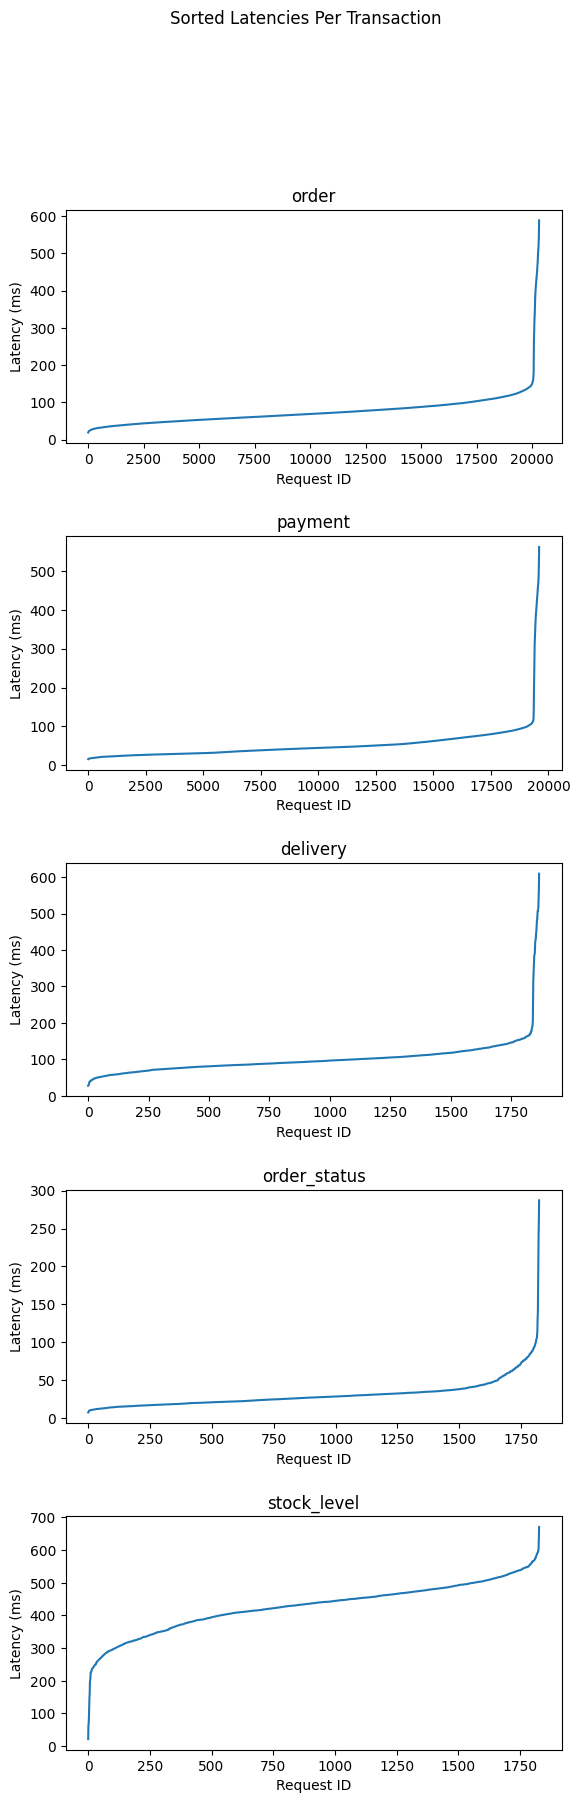

In [12]:
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('Sorted Latencies Per Transaction')
for i, key in enumerate(data):
    axes[i].plot(data[key])
    axes[i].set_title(key)
    axes[i].set_xlabel('Request ID')
    axes[i].set_ylabel('Latency (ms)')
figure.savefig(os.path.join(RESULTS_DIR, '/sorted_latency.png'))

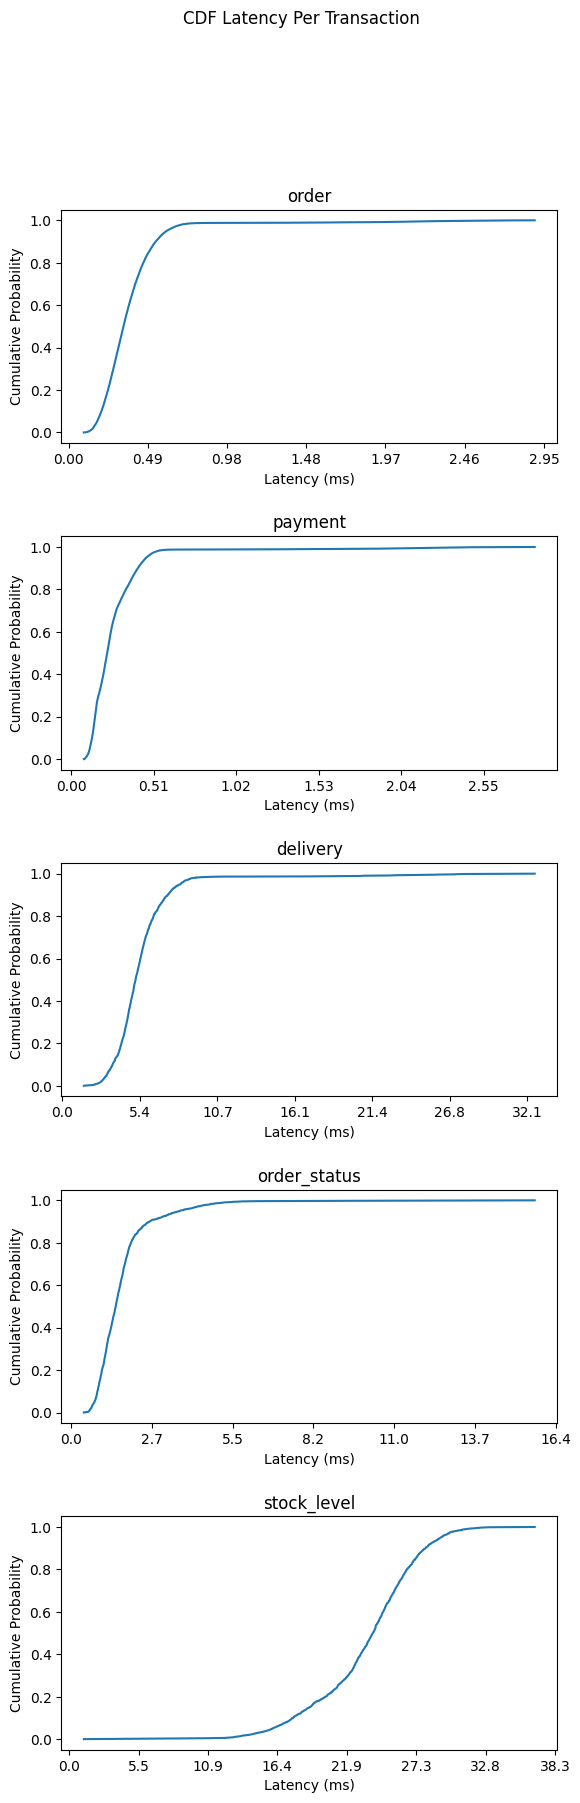

In [30]:
# Cumulative Distribution Function
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('CDF Latency Per Transaction')
for i, key in enumerate(data):
    cumsum = np.arange(1, len(data[key]) + 1) / len(data[key])
axes[i].plot(data[key], cumsum)
axes[i].set_title(key)
axes[i].set_xlabel('Latency (ms)')
axes[i].set_ylabel('Cumulative Probability')
axes[i].xaxis.set_major_formatter(mtick.PercentFormatter(len(data[key]), symbol=''))
figure.savefig(os.path.join(RESULTS_DIR, '/cdf_latency.png'))

# Metrics

In [56]:
latency_quantiles = [[key,
                      round(data[key].quantile(q=0.5), 4),
                      round(data[key].quantile(q=0.9), 4),
                      round(data[key].quantile(q=0.95), 4),
                      round(data[key].quantile(q=0.99), 4)]
                     for key in data]
df = pd.DataFrame(latency_quantiles, columns=['Transaction', 'P50', 'P90', 'P95', 'P99'])
df.to_csv(os.path.join(RESULTS_DIR, 'latency_quantiles.csv'), index=False)
df

,Transaction,P50,P90,P95,P99
0,payment,14.4656,31.3468,37.6337,128.0538
1,order,29.0579,45.2856,52.8048,140.0931
2,delivery,38.8124,55.8677,63.1964,151.8026
3,order_status,14.1698,30.9011,36.7863,127.0688
4,stock_level,127.5202,148.7691,158.2012,238.3911


In [51]:
data['payment'].describe()

count    47420.000000
mean        22.312273
std         21.792280
min          8.733273
25%         11.799037
50%         14.465570
75%         25.565982
max        159.264088
dtype: float64